## Making the Video ## 

This is a continuation of my final project for Coding 3 for my MsC in Creative Computing.

For my project I created a VAE model in order to do unsupervised machine learning. My idea is to train the model on each frame of a short film, then create a new video that is controlled by a song.

The dataset I used for this ML model was over 5k images that were frames from a short film from my company Off Hand Co called "Works for Me".

Once the dataset was trained, I exported the decoder for further use.

I experimented with generating random latent vectors and was able to successfully produce images.

Then I uploaded a song I've recorded and used the python librosa library to find values of amplitude (loudness) of the music. Because librosa gives the amplitude 22,050x a second, I saved every 735th value so I would have 30 per second. Then I exported these amplitude values into a csv file.

Now I used the values from the CSV file to feed into the decoder. The idea was basically to see what the ML model "decided" was important and the patterns it found in the images, and then to use the values (scaled to the range of latent vector) to generate new images which I would make into a new video. I hoped that the images would change as the song gets louder, and that certainly did seem to happen in some ways. I want to use a different dataset of a different film I made and adjust the settings to see what results I get.

To write this code I used chatGPT to assist with the machine learning model and training/exporting it. The video and sound manipulation was done using some straightforward python libraries. The code I wrote using the help of chatGPT, sometimes asking it line-by-line how to do things. I had to break down this project into small and simple steps in order for ChatGPT to be useful.



## Resize Images ##

I needed to resize the images for the video - the original images generated were too large. 

In [1]:
import os
import cv2

# Set the input folder path
folder_path = 'frames/'

# Set the output folder path
output_folder_path = 'resized_images3/'

# Create the output folder if it doesn't exist
os.makedirs(output_folder_path, exist_ok=True)

# Get the list of image files in the input folder
image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

# Loop through each image file and resize
for file_name in image_files:
    try:
        # Read the image
        image_path = os.path.join(folder_path, file_name)
        image = cv2.imread(image_path)

        if image is not None:
            # Set the desired width and height
            desired_width = 200
            desired_height = 100

            # Resize the image
            resized_image = cv2.resize(image, (desired_width, desired_height))

            # Write the resized image to the output folder
            output_path = os.path.join(output_folder_path, file_name)
            cv2.imwrite(output_path, resized_image)

            print(f"Resized image '{file_name}' and saved to '{output_path}'")
        else:
            print(f"Skipping image '{file_name}' due to loading error")
    except Exception as e:
        print(f"An error occurred while processing image '{file_name}': {str(e)}")


Resized image 'frame_0558.png' and saved to 'resized_images3/frame_0558.png'
Resized image 'frame_1646.png' and saved to 'resized_images3/frame_1646.png'
Resized image 'frame_3051.png' and saved to 'resized_images3/frame_3051.png'
Resized image 'frame_3737.png' and saved to 'resized_images3/frame_3737.png'
Resized image 'frame_4058.png' and saved to 'resized_images3/frame_4058.png'
Resized image 'frame_2429.png' and saved to 'resized_images3/frame_2429.png'
Resized image 'frame_1120.png' and saved to 'resized_images3/frame_1120.png'
Resized image 'frame_1134.png' and saved to 'resized_images3/frame_1134.png'
Resized image 'frame_3723.png' and saved to 'resized_images3/frame_3723.png'
Resized image 'frame_3045.png' and saved to 'resized_images3/frame_3045.png'
Resized image 'frame_1652.png' and saved to 'resized_images3/frame_1652.png'
Resized image 'frame_2373.png' and saved to 'resized_images3/frame_2373.png'
Resized image 'frame_4702.png' and saved to 'resized_images3/frame_4702.png'

Resized image 'frame_0835.png' and saved to 'resized_images3/frame_0835.png'
Resized image 'frame_0821.png' and saved to 'resized_images3/frame_0821.png'
Resized image 'frame_1281.png' and saved to 'resized_images3/frame_1281.png'
Resized image 'frame_2788.png' and saved to 'resized_images3/frame_2788.png'
Resized image 'frame_3496.png' and saved to 'resized_images3/frame_3496.png'
Resized image 'frame_2950.png' and saved to 'resized_images3/frame_2950.png'
Resized image 'frame_2978.png' and saved to 'resized_images3/frame_2978.png'
Resized image 'frame_0809.png' and saved to 'resized_images3/frame_0809.png'
Resized image 'frame_1732.png' and saved to 'resized_images3/frame_1732.png'
Resized image 'frame_3125.png' and saved to 'resized_images3/frame_3125.png'
Resized image 'frame_4892.png' and saved to 'resized_images3/frame_4892.png'
Resized image 'frame_5232.png' and saved to 'resized_images3/frame_5232.png'
Resized image 'frame_3643.png' and saved to 'resized_images3/frame_3643.png'

Resized image 'frame_2776.png' and saved to 'resized_images3/frame_2776.png'
Resized image 'frame_5019.png' and saved to 'resized_images3/frame_5019.png'
Resized image 'frame_4307.png' and saved to 'resized_images3/frame_4307.png'
Resized image 'frame_3468.png' and saved to 'resized_images3/frame_3468.png'
Resized image 'frame_2762.png' and saved to 'resized_images3/frame_2762.png'
Resized image 'frame_4313.png' and saved to 'resized_images3/frame_4313.png'
Resized image 'frame_4475.png' and saved to 'resized_images3/frame_4475.png'
Resized image 'frame_2004.png' and saved to 'resized_images3/frame_2004.png'
Resized image 'frame_0613.png' and saved to 'resized_images3/frame_0613.png'
Resized image 'frame_3332.png' and saved to 'resized_images3/frame_3332.png'
Resized image 'frame_1525.png' and saved to 'resized_images3/frame_1525.png'
Resized image 'frame_1243.png' and saved to 'resized_images3/frame_1243.png'
Resized image 'frame_5025.png' and saved to 'resized_images3/frame_5025.png'

Resized image 'frame_3734.png' and saved to 'resized_images3/frame_3734.png'
Resized image 'frame_1123.png' and saved to 'resized_images3/frame_1123.png'
Resized image 'frame_1645.png' and saved to 'resized_images3/frame_1645.png'
Resized image 'frame_3052.png' and saved to 'resized_images3/frame_3052.png'
Resized image 'frame_0573.png' and saved to 'resized_images3/frame_0573.png'
Resized image 'frame_2364.png' and saved to 'resized_images3/frame_2364.png'
Resized image 'frame_4715.png' and saved to 'resized_images3/frame_4715.png'
Resized image 'frame_4073.png' and saved to 'resized_images3/frame_4073.png'
Resized image 'frame_2402.png' and saved to 'resized_images3/frame_2402.png'
Resized image 'frame_3708.png' and saved to 'resized_images3/frame_3708.png'
Resized image 'frame_4067.png' and saved to 'resized_images3/frame_4067.png'
Resized image 'frame_2416.png' and saved to 'resized_images3/frame_2416.png'
Resized image 'frame_2370.png' and saved to 'resized_images3/frame_2370.png'

Resized image 'frame_3654.png' and saved to 'resized_images3/frame_3654.png'
Resized image 'frame_3898.png' and saved to 'resized_images3/frame_3898.png'
Resized image 'frame_5231.png' and saved to 'resized_images3/frame_5231.png'
Resized image 'frame_3640.png' and saved to 'resized_images3/frame_3640.png'
Resized image 'frame_1057.png' and saved to 'resized_images3/frame_1057.png'
Resized image 'frame_1731.png' and saved to 'resized_images3/frame_1731.png'
Resized image 'frame_3126.png' and saved to 'resized_images3/frame_3126.png'
Resized image 'frame_4649.png' and saved to 'resized_images3/frame_4649.png'
Resized image 'frame_2238.png' and saved to 'resized_images3/frame_2238.png'
Resized image 'frame_4891.png' and saved to 'resized_images3/frame_4891.png'
Resized image 'frame_1719.png' and saved to 'resized_images3/frame_1719.png'
Resized image 'frame_0407.png' and saved to 'resized_images3/frame_0407.png'
Resized image 'frame_4661.png' and saved to 'resized_images3/frame_4661.png'

Resized image 'frame_0638.png' and saved to 'resized_images3/frame_0638.png'
Resized image 'frame_3292.png' and saved to 'resized_images3/frame_3292.png'
Resized image 'frame_0943.png' and saved to 'resized_images3/frame_0943.png'
Resized image 'frame_1485.png' and saved to 'resized_images3/frame_1485.png'
Resized image 'frame_5185.png' and saved to 'resized_images3/frame_5185.png'
Resized image 'frame_2832.png' and saved to 'resized_images3/frame_2832.png'
Resized image 'frame_5191.png' and saved to 'resized_images3/frame_5191.png'
Resized image 'frame_2826.png' and saved to 'resized_images3/frame_2826.png'
Resized image 'frame_0957.png' and saved to 'resized_images3/frame_0957.png'
Resized image 'frame_1491.png' and saved to 'resized_images3/frame_1491.png'
Resized image 'frame_3286.png' and saved to 'resized_images3/frame_3286.png'
Resized image 'frame_2198.png' and saved to 'resized_images3/frame_2198.png'
Resized image 'frame_2173.png' and saved to 'resized_images3/frame_2173.png'

Resized image 'frame_1683.png' and saved to 'resized_images3/frame_1683.png'
Resized image 'frame_4512.png' and saved to 'resized_images3/frame_4512.png'
Resized image 'frame_2163.png' and saved to 'resized_images3/frame_2163.png'
Resized image 'frame_0774.png' and saved to 'resized_images3/frame_0774.png'
Resized image 'frame_2605.png' and saved to 'resized_images3/frame_2605.png'
Resized image 'frame_4274.png' and saved to 'resized_images3/frame_4274.png'
Resized image 'frame_2611.png' and saved to 'resized_images3/frame_2611.png'
Resized image 'frame_4260.png' and saved to 'resized_images3/frame_4260.png'
Resized image 'frame_1318.png' and saved to 'resized_images3/frame_1318.png'
Resized image 'frame_0760.png' and saved to 'resized_images3/frame_0760.png'
Resized image 'frame_4506.png' and saved to 'resized_images3/frame_4506.png'
Resized image 'frame_3269.png' and saved to 'resized_images3/frame_3269.png'
Resized image 'frame_2177.png' and saved to 'resized_images3/frame_2177.png'

Resized image 'frame_3692.png' and saved to 'resized_images3/frame_3692.png'
Resized image 'frame_1085.png' and saved to 'resized_images3/frame_1085.png'
Resized image 'frame_4843.png' and saved to 'resized_images3/frame_4843.png'
Resized image 'frame_4857.png' and saved to 'resized_images3/frame_4857.png'
Resized image 'frame_1091.png' and saved to 'resized_images3/frame_1091.png'
Resized image 'frame_3686.png' and saved to 'resized_images3/frame_3686.png'
Resized image 'frame_2598.png' and saved to 'resized_images3/frame_2598.png'
Resized image 'frame_4856.png' and saved to 'resized_images3/frame_4856.png'
Resized image 'frame_2599.png' and saved to 'resized_images3/frame_2599.png'
Resized image 'frame_3687.png' and saved to 'resized_images3/frame_3687.png'
Resized image 'frame_1090.png' and saved to 'resized_images3/frame_1090.png'
Resized image 'frame_1084.png' and saved to 'resized_images3/frame_1084.png'
Resized image 'frame_3693.png' and saved to 'resized_images3/frame_3693.png'

Resized image 'frame_1319.png' and saved to 'resized_images3/frame_1319.png'
Resized image 'frame_4261.png' and saved to 'resized_images3/frame_4261.png'
Resized image 'frame_2610.png' and saved to 'resized_images3/frame_2610.png'
Resized image 'frame_2176.png' and saved to 'resized_images3/frame_2176.png'
Resized image 'frame_3268.png' and saved to 'resized_images3/frame_3268.png'
Resized image 'frame_4507.png' and saved to 'resized_images3/frame_4507.png'
Resized image 'frame_0761.png' and saved to 'resized_images3/frame_0761.png'
Resized image 'frame_0775.png' and saved to 'resized_images3/frame_0775.png'
Resized image 'frame_2162.png' and saved to 'resized_images3/frame_2162.png'
Resized image 'frame_4513.png' and saved to 'resized_images3/frame_4513.png'
Resized image 'frame_4275.png' and saved to 'resized_images3/frame_4275.png'
Resized image 'frame_2604.png' and saved to 'resized_images3/frame_2604.png'
Resized image 'frame_1682.png' and saved to 'resized_images3/frame_1682.png'

KeyboardInterrupt: 

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


In [2]:
# Define the folder path
folder_path = "resized_images3/"

# Initialize an empty list to store the image data
image_data = []

# Loop through each file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".png"):
        file_path = os.path.join(folder_path, filename)
        
        # Open the image and convert it to a numpy array
        image = np.array(Image.open(file_path))
        
        # Preprocess the image if required
        # e.g., normalize, resize, convert to grayscale, etc.
        
        # Append the preprocessed image to the list
        image_data.append(image)
        
        print(f"Processed image: {filename}")


Processed image: frame_0558.png
Processed image: frame_1646.png
Processed image: frame_3051.png
Processed image: frame_3737.png
Processed image: frame_4058.png
Processed image: frame_2429.png
Processed image: frame_1120.png
Processed image: frame_1134.png
Processed image: frame_3723.png
Processed image: frame_3045.png
Processed image: frame_1652.png
Processed image: frame_2373.png
Processed image: frame_4702.png
Processed image: frame_0564.png
Processed image: frame_4064.png
Processed image: frame_2415.png
Processed image: frame_4070.png
Processed image: frame_2401.png
Processed image: frame_1108.png
Processed image: frame_0570.png
Processed image: frame_2367.png
Processed image: frame_4716.png
Processed image: frame_3079.png
Processed image: frame_3092.png
Processed image: frame_4925.png
Processed image: frame_1685.png
Processed image: frame_3938.png
Processed image: frame_1691.png
Processed image: frame_1849.png
Processed image: frame_3086.png
Processed image: frame_4931.png
Processe

Processed image: frame_4065.png
Processed image: frame_3722.png
Processed image: frame_1135.png
Processed image: frame_1653.png
Processed image: frame_3044.png
Processed image: frame_3050.png
Processed image: frame_1647.png
Processed image: frame_0559.png
Processed image: frame_1121.png
Processed image: frame_2428.png
Processed image: frame_4059.png
Processed image: frame_3736.png
Processed image: frame_2358.png
Processed image: frame_4729.png
Processed image: frame_3046.png
Processed image: frame_1889.png
Processed image: frame_1651.png
Processed image: frame_1137.png
Processed image: frame_3720.png
Processed image: frame_3734.png
Processed image: frame_1123.png
Processed image: frame_1645.png
Processed image: frame_3052.png
Processed image: frame_0573.png
Processed image: frame_2364.png
Processed image: frame_4715.png
Processed image: frame_4073.png
Processed image: frame_2402.png
Processed image: frame_3708.png
Processed image: frame_4067.png
Processed image: frame_2416.png
Processe

Processed image: frame_3709.png
Processed image: frame_1678.png
Processed image: frame_0566.png
Processed image: frame_4700.png
Processed image: frame_2371.png
Processed image: frame_4714.png
Processed image: frame_2365.png
Processed image: frame_0572.png
Processed image: frame_2403.png
Processed image: frame_4072.png
Processed image: frame_1122.png
Processed image: frame_3735.png
Processed image: frame_3053.png
Processed image: frame_1644.png
Processed image: frame_1650.png
Processed image: frame_1888.png
Processed image: frame_3047.png
Processed image: frame_4728.png
Processed image: frame_2359.png
Processed image: frame_3721.png
Processed image: frame_1136.png
Processed image: frame_4076.png
Processed image: frame_3719.png
Processed image: frame_2407.png
Processed image: frame_0576.png
Processed image: frame_1668.png
Processed image: frame_2361.png
Processed image: frame_4710.png
Processed image: frame_2375.png
Processed image: frame_4704.png
Processed image: frame_0562.png
Processe

Processed image: frame_4088.png
Processed image: frame_4936.png
Processed image: frame_3081.png
Processed image: frame_0588.png
Processed image: frame_1696.png
Processed image: frame_1866.png
Processed image: frame_3917.png
Processed image: frame_3903.png
Processed image: frame_1872.png
Processed image: frame_4739.png
Processed image: frame_3056.png
Processed image: frame_2348.png
Processed image: frame_1641.png
Processed image: frame_1899.png
Processed image: frame_1127.png
Processed image: frame_3730.png
Processed image: frame_3724.png
Processed image: frame_1133.png
Processed image: frame_1655.png
Processed image: frame_3042.png
Processed image: frame_0563.png
Processed image: frame_4705.png
Processed image: frame_2374.png
Processed image: frame_2412.png
Processed image: frame_4063.png
Processed image: frame_2406.png
Processed image: frame_3718.png
Processed image: frame_4077.png
Processed image: frame_4711.png
Processed image: frame_2360.png
Processed image: frame_1669.png
Processe

Processed image: frame_4538.png
Processed image: frame_3531.png
Processed image: frame_5140.png
Processed image: frame_1326.png
Processed image: frame_4276.png
Processed image: frame_3519.png
Processed image: frame_2607.png
Processed image: frame_5168.png
Processed image: frame_0776.png
Processed image: frame_1468.png
Processed image: frame_2161.png
Processed image: frame_4510.png
Processed image: frame_2175.png
Processed image: frame_4504.png
Processed image: frame_0762.png
Processed image: frame_4262.png
Processed image: frame_2613.png
Processed image: frame_4935.png
Processed image: frame_3082.png
Processed image: frame_1695.png
Processed image: frame_3928.png
Processed image: frame_1859.png
Processed image: frame_1681.png
Processed image: frame_2388.png
Processed image: frame_4921.png
Processed image: frame_3096.png
Processed image: frame_1871.png
Processed image: frame_4909.png
Processed image: frame_3900.png
Processed image: frame_3914.png
Processed image: frame_1865.png
Processe

Processed image: frame_4204.png
Processed image: frame_2675.png
Processed image: frame_3543.png
Processed image: frame_2885.png
Processed image: frame_5132.png
Processed image: frame_1354.png
Processed image: frame_1432.png
Processed image: frame_3225.png
Processed image: frame_3231.png
Processed image: frame_0738.png
Processed image: frame_1426.png
Processed image: frame_1340.png
Processed image: frame_3557.png
Processed image: frame_2891.png
Processed image: frame_4238.png
Processed image: frame_5126.png
Processed image: frame_2649.png
Processed image: frame_1817.png
Processed image: frame_3966.png
Processed image: frame_3972.png
Processed image: frame_1803.png
Processed image: frame_4953.png
Processed image: frame_3782.png
Processed image: frame_1195.png
Processed image: frame_1181.png
Processed image: frame_3796.png
Processed image: frame_2488.png
Processed image: frame_4947.png
Processed image: frame_0512.png
Processed image: frame_4774.png
Processed image: frame_2305.png
Processe

Processed image: frame_3583.png
Processed image: frame_2845.png
Processed image: frame_3568.png
Processed image: frame_4207.png
Processed image: frame_5119.png
Processed image: frame_2676.png
Processed image: frame_0707.png
Processed image: frame_1419.png
Processed image: frame_2110.png
Processed image: frame_4561.png
Processed image: frame_2104.png
Processed image: frame_4575.png
Processed image: frame_0713.png
Processed image: frame_4213.png
Processed image: frame_2662.png
Processed image: frame_1343.png
Processed image: frame_3554.png
Processed image: frame_2892.png
Processed image: frame_5125.png
Processed image: frame_3232.png
Processed image: frame_1425.png
Processed image: frame_1431.png
Processed image: frame_2138.png
Processed image: frame_4549.png
Processed image: frame_3226.png
Processed image: frame_3540.png
Processed image: frame_2886.png
Processed image: frame_5131.png
Processed image: frame_1357.png
Processed image: frame_1800.png
Processed image: frame_4978.png
Processe

Processed image: frame_0925.png
Processed image: frame_2854.png
Processed image: frame_3592.png
Processed image: frame_1385.png
Processed image: frame_1391.png
Processed image: frame_2698.png
Processed image: frame_2840.png
Processed image: frame_3586.png
Processed image: frame_0931.png
Processed image: frame_0919.png
Processed image: frame_2868.png
Processed image: frame_2129.png
Processed image: frame_3237.png
Processed image: frame_4558.png
Processed image: frame_1420.png
Processed image: frame_1346.png
Processed image: frame_2897.png
Processed image: frame_3551.png
Processed image: frame_5120.png
Processed image: frame_2883.png
Processed image: frame_3545.png
Processed image: frame_5134.png
Processed image: frame_1352.png
Processed image: frame_1434.png
Processed image: frame_3223.png
Processed image: frame_0702.png
Processed image: frame_2115.png
Processed image: frame_4564.png
Processed image: frame_4202.png
Processed image: frame_2673.png
Processed image: frame_4216.png
Processe

Processed image: frame_2880.png
Processed image: frame_4229.png
Processed image: frame_3546.png
Processed image: frame_2658.png
Processed image: frame_5137.png
Processed image: frame_1351.png
Processed image: frame_1345.png
Processed image: frame_2894.png
Processed image: frame_3552.png
Processed image: frame_5123.png
Processed image: frame_3234.png
Processed image: frame_1423.png
Processed image: frame_2102.png
Processed image: frame_4573.png
Processed image: frame_0715.png
Processed image: frame_4215.png
Processed image: frame_2664.png
Processed image: frame_4201.png
Processed image: frame_2670.png
Processed image: frame_1379.png
Processed image: frame_0701.png
Processed image: frame_2116.png
Processed image: frame_3208.png
Processed image: frame_4567.png
Processed image: frame_3787.png
Processed image: frame_2499.png
Processed image: frame_1190.png
Processed image: frame_4956.png
Processed image: frame_4942.png
Processed image: frame_1184.png
Processed image: frame_3793.png
Processe

Processed image: frame_4225.png
Processed image: frame_2654.png
Processed image: frame_1375.png
Processed image: frame_3562.png
Processed image: frame_5113.png
Processed image: frame_3204.png
Processed image: frame_1413.png
Processed image: frame_0719.png
Processed image: frame_1407.png
Processed image: frame_3210.png
Processed image: frame_3576.png
Processed image: frame_4219.png
Processed image: frame_5107.png
Processed image: frame_2668.png
Processed image: frame_1361.png
Processed image: frame_1836.png
Processed image: frame_4796.png
Processed image: frame_2481.png
Processed image: frame_3947.png
Processed image: frame_1188.png
Processed image: frame_2495.png
Processed image: frame_3953.png
Processed image: frame_4782.png
Processed image: frame_1822.png
Processed image: frame_4972.png
Processed image: frame_4966.png
Processed image: frame_4755.png
Processed image: frame_2324.png
Processed image: frame_0533.png
Processed image: frame_2442.png
Processed image: frame_3984.png
Processe

Processed image: frame_4232.png
Processed image: frame_2643.png
Processed image: frame_3575.png
Processed image: frame_5104.png
Processed image: frame_1362.png
Processed image: frame_1404.png
Processed image: frame_3213.png
Processed image: frame_2119.png
Processed image: frame_4568.png
Processed image: frame_3207.png
Processed image: frame_1410.png
Processed image: frame_1376.png
Processed image: frame_3561.png
Processed image: frame_5110.png
Processed image: frame_4959.png
Processed image: frame_4781.png
Processed image: frame_1821.png
Processed image: frame_3788.png
Processed image: frame_2496.png
Processed image: frame_3950.png
Processed image: frame_2482.png
Processed image: frame_3944.png
Processed image: frame_1835.png
Processed image: frame_4795.png
Processed image: frame_4965.png
Processed image: frame_3978.png
Processed image: frame_4971.png
Processed image: frame_1809.png
Processed image: frame_0524.png
Processed image: frame_4742.png
Processed image: frame_2333.png
Processe

Processed image: frame_3564.png
Processed image: frame_5115.png
Processed image: frame_3202.png
Processed image: frame_1415.png
Processed image: frame_2134.png
Processed image: frame_4545.png
Processed image: frame_0723.png
Processed image: frame_4223.png
Processed image: frame_2652.png
Processed image: frame_4237.png
Processed image: frame_3558.png
Processed image: frame_2646.png
Processed image: frame_5129.png
Processed image: frame_0737.png
Processed image: frame_1429.png
Processed image: frame_2120.png
Processed image: frame_4551.png
Processed image: frame_3969.png
Processed image: frame_1818.png
Processed image: frame_4960.png
Processed image: frame_4974.png
Processed image: frame_3955.png
Processed image: frame_2493.png
Processed image: frame_4784.png
Processed image: frame_1824.png
Processed image: frame_1830.png
Processed image: frame_4948.png
Processed image: frame_4790.png
Processed image: frame_3799.png
Processed image: frame_3941.png
Processed image: frame_2487.png
Processe

Processed image: frame_2679.png
Processed image: frame_5116.png
Processed image: frame_3573.png
Processed image: frame_5102.png
Processed image: frame_1364.png
Processed image: frame_1402.png
Processed image: frame_3215.png
Processed image: frame_0734.png
Processed image: frame_2123.png
Processed image: frame_4552.png
Processed image: frame_4234.png
Processed image: frame_2645.png
Processed image: frame_1358.png
Processed image: frame_4220.png
Processed image: frame_2889.png
Processed image: frame_2651.png
Processed image: frame_2137.png
Processed image: frame_3229.png
Processed image: frame_4546.png
Processed image: frame_0720.png
Processed image: frame_4977.png
Processed image: frame_4963.png
Processed image: frame_3942.png
Processed image: frame_2484.png
Processed image: frame_1833.png
Processed image: frame_4793.png
Processed image: frame_4787.png
Processed image: frame_1827.png
Processed image: frame_1199.png
Processed image: frame_3956.png
Processed image: frame_2490.png
Processe

Processed image: frame_2145.png
Processed image: frame_4534.png
Processed image: frame_0752.png
Processed image: frame_4252.png
Processed image: frame_2623.png
Processed image: frame_3529.png
Processed image: frame_4246.png
Processed image: frame_5158.png
Processed image: frame_2637.png
Processed image: frame_0746.png
Processed image: frame_1458.png
Processed image: frame_2151.png
Processed image: frame_4520.png
Processed image: frame_1470.png
Processed image: frame_2179.png
Processed image: frame_4508.png
Processed image: frame_3267.png
Processed image: frame_3501.png
Processed image: frame_5170.png
Processed image: frame_1316.png
Processed image: frame_1302.png
Processed image: frame_3515.png
Processed image: frame_5164.png
Processed image: frame_3273.png
Processed image: frame_1464.png
Processed image: frame_4093.png
Processed image: frame_3924.png
Processed image: frame_2384.png
Processed image: frame_1855.png
Processed image: frame_0593.png
Processed image: frame_1841.png
Processe

Processed image: frame_2146.png
Processed image: frame_4537.png
Processed image: frame_3258.png
Processed image: frame_0751.png
Processed image: frame_0989.png
Processed image: frame_3270.png
Processed image: frame_0779.png
Processed image: frame_1467.png
Processed image: frame_1301.png
Processed image: frame_3516.png
Processed image: frame_4279.png
Processed image: frame_5167.png
Processed image: frame_2608.png
Processed image: frame_3502.png
Processed image: frame_5173.png
Processed image: frame_1315.png
Processed image: frame_1473.png
Processed image: frame_3264.png
Processed image: frame_4084.png
Processed image: frame_3933.png
Processed image: frame_1842.png
Processed image: frame_0584.png
Processed image: frame_2393.png
Processed image: frame_2387.png
Processed image: frame_3099.png
Processed image: frame_1856.png
Processed image: frame_0590.png
Processed image: frame_4090.png
Processed image: frame_3927.png
Processed image: frame_4906.png
Processed image: frame_4912.png
Processe

Processed image: frame_5176.png
Processed image: frame_1310.png
Processed image: frame_4240.png
Processed image: frame_2631.png
Processed image: frame_1338.png
Processed image: frame_0740.png
Processed image: frame_0998.png
Processed image: frame_2157.png
Processed image: frame_3249.png
Processed image: frame_4526.png
Processed image: frame_2143.png
Processed image: frame_4532.png
Processed image: frame_0754.png
Processed image: frame_4254.png
Processed image: frame_2625.png
Processed image: frame_4903.png
Processed image: frame_4917.png
Processed image: frame_0581.png
Processed image: frame_1847.png
Processed image: frame_2396.png
Processed image: frame_3088.png
Processed image: frame_4081.png
Processed image: frame_3936.png
Processed image: frame_4095.png
Processed image: frame_3922.png
Processed image: frame_2382.png
Processed image: frame_0595.png
Processed image: frame_1853.png
Processed image: frame_1660.png
Processed image: frame_4718.png
Processed image: frame_3077.png
Processe

Processed image: frame_5175.png
Processed image: frame_1313.png
Processed image: frame_1475.png
Processed image: frame_3262.png
Processed image: frame_2168.png
Processed image: frame_3276.png
Processed image: frame_4519.png
Processed image: frame_1461.png
Processed image: frame_1307.png
Processed image: frame_3510.png
Processed image: frame_5161.png
Processed image: frame_4257.png
Processed image: frame_3538.png
Processed image: frame_2626.png
Processed image: frame_5149.png
Processed image: frame_2140.png
Processed image: frame_4531.png
Processed image: frame_0757.png
Processed image: frame_1449.png
Processed image: frame_0743.png
Processed image: frame_2154.png
Processed image: frame_4525.png
Processed image: frame_4243.png
Processed image: frame_2632.png
Processed image: frame_4914.png
Processed image: frame_3909.png
Processed image: frame_4900.png
Processed image: frame_1878.png
Processed image: frame_4928.png
Processed image: frame_2381.png
Processed image: frame_0596.png
Processe

In [3]:
image_data = np.array(image_data)
print("Image data shape:", image_data.shape)


Image data shape: (4861, 200, 400, 3)


## Test! ##

I wanted to test to make sure that this worked, so I took a random number (9) and made sure that I was able to take the value in the Amplitude csv and make it into an image. 

1/1 [==============================] - 0s 21ms/step


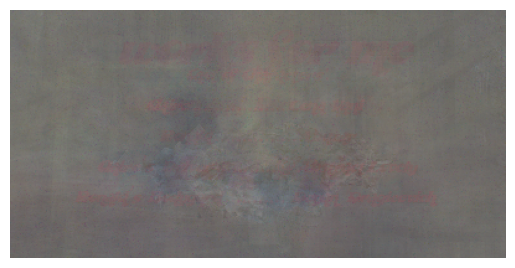

In [35]:
import pandas as pd
import numpy as np

# Load the CSV file
csv_data = pd.read_csv('updated_amplitude.csv')

# Extract the 5th value from the column "Amplitude"
value = csv_data['Amplitude'].values[56]  # Assuming the index starts from 0

# Normalize the value if needed
max_value = csv_data['Amplitude'].max()
value = value / max_value  # Normalize by dividing by the maximum value in the column

# Define the dimension of the latent space (adjust according to your model)
latent_dim = 9

# Generate a new image
random_latent_vector = np.random.normal(size=(1, latent_dim))
latent_vector = np.concatenate([random_latent_vector, [[value]]], axis=1)

# Reshape the latent_vector to match the expected input shape of the decoder model
latent_vector = latent_vector.reshape((1, latent_dim + 1))

generated_image = decoder.predict(latent_vector)

import matplotlib.pyplot as plt

# Assuming `generated_image` contains the generated image
plt.imshow(generated_image[0])  # Display the first image in the batch
plt.axis('off')  # Remove axis ticks
plt.show()

In [36]:
import os
import pandas as pd
import numpy as np
from PIL import Image

# Create the "newlygenerated" folder if it doesn't exist
if not os.path.exists('newlygenerated'):
    os.makedirs('newlygenerated')

# Load the CSV file
csv_data = pd.read_csv('updated_amplitude.csv')

# Extract the column containing the values
column_name = 'Amplitude'  # Replace with the actual column name
column_values = csv_data[column_name].values

# Normalize the column values if needed
max_value = column_values.max()
column_values = column_values / max_value

latent_dim = 9

# Generate and save an image for each value
for i, value in enumerate(column_values):
    # Generate a new image
    random_latent_vector = np.random.normal(size=(1, latent_dim))
    latent_vector = np.concatenate([random_latent_vector, [[value]]], axis=1)
    latent_vector = latent_vector.reshape((1, latent_dim + 1))
    generated_image = decoder.predict(latent_vector)

    # Save the generated image
    image_path = os.path.join('newlygenerated', f'image_{i}.png')
    generated_image = np.squeeze(generated_image, axis=0)  # Remove batch dimension
    generated_image = (generated_image * 255).astype(np.uint8)  # Convert to 8-bit integer
    image = Image.fromarray(generated_image)
    image.save(image_path)


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 46ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 20ms/step


## Making the Video ##

Now, becasuse I selected every 735th value, the video should be 30fps to match up with the song. This ended up working well and the video was exactly the same length as the song. 

In [42]:
import os
import numpy as np
import imageio

folder_path = 'newlygenerated'
output_video_path = 'output_video.mp4'
fps = 30

image_files = sorted(os.listdir(folder_path))

# Create the video from the image files
with imageio.get_writer(output_video_path, mode='I', fps=fps, macro_block_size=1) as writer:
    for image_file in image_files:
        image_path = os.path.join(folder_path, image_file)
        image = imageio.v3.imread(image_path)

        # Normalize the image
        min_val = np.min(image)
        max_val = np.max(image)
        if min_val != max_val:
            image = (image - min_val) / (max_val - min_val) * 255

        # Convert the image to uint8
        image = image.astype(np.uint8)

        writer.append_data(image)


In [44]:
import os
import numpy as np
import imageio

folder_path = 'newlygenerated'
output_video_path = 'output_video2.mp4'
fps = 30

image_files = sorted(os.listdir(folder_path))

# Create the video from the image files
with imageio.get_writer(output_video_path, mode='I', fps=fps, macro_block_size=1) as writer:
    previous_frame = None
    for image_file in image_files:
        image_path = os.path.join(folder_path, image_file)
        image = imageio.v3.imread(image_path)

        # Check if the image is completely black
        if np.all(image == 0):
            if previous_frame is not None:
                image = previous_frame
        else:
            if previous_frame is not None:
                image_diff = image - previous_frame
                for _ in range(10):  # Transition over 10 steps
                    interpolated_image = previous_frame + image_diff / 10
                    writer.append_data(interpolated_image.astype(np.uint8))
                    previous_frame = interpolated_image

        # Normalize the image
        min_val = np.min(image)
        max_val = np.max(image)
        if min_val != max_val:
            image = (image - min_val) / (max_val - min_val) * 255

        # Convert the image to uint8
        image = image.astype(np.uint8)

        writer.append_data(image)
        previous_frame = image


Link to the results of this on youtube: 

https://www.youtube.com/watch?v=iHyoilV8OI0